<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/advanced-dls-spring-2021/submission.csv
/kaggle/input/advanced-dls-spring-2021/train.csv
/kaggle/input/advanced-dls-spring-2021/test.csv


In [4]:
data = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/train.csv')
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4062,35,76.05,2747.2,Male,1,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0
732,69,85.40,5869.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0
3177,48,29.50,1423.05,Female,0,Yes,Yes,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),0
2574,32,91.05,2871.5,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,0
3714,24,54.60,1242.25,Male,0,No,No,Yes,Yes,DSL,No,No,No,Yes,No,No,One year,No,Bank transfer (automatic),0


In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим на количество nan в каждой колонке

In [6]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Посмотрим на числовые признаки

In [7]:
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5282 non-null   int64  
 1   MonthlySpending  5282 non-null   float64
 2   TotalSpent       5282 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 123.9+ KB


Попытка выполнить `data['TotalSpent'] = data['TotalSpent'].astype(float)` завершается ошибкой из-за пропусков. Необходимо избавиться от таких записей

In [8]:
data = data.drop(data[data.TotalSpent == ' '].index)
data['TotalSpent'] = data['TotalSpent'].astype(float)
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5273 non-null   int64  
 1   MonthlySpending  5273 non-null   float64
 2   TotalSpent       5273 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 164.8 KB


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

* Чиловые признаки

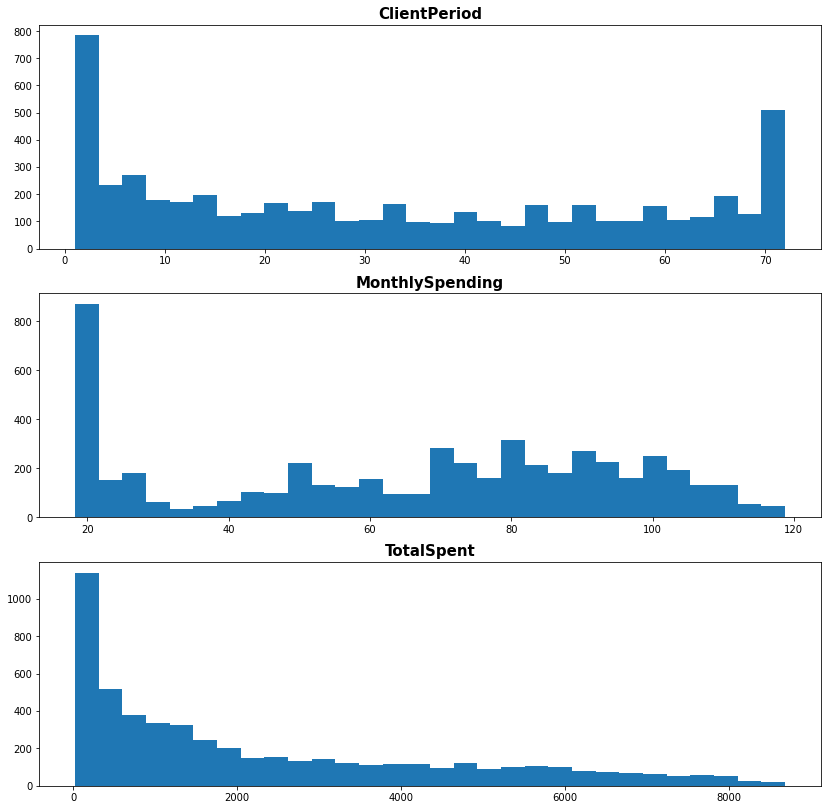

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(14,14))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(data[col], bins=30)
    axes[i].set_title(col, size=15).set_weight('bold')
    
plt.show()

* Категориальные признаки

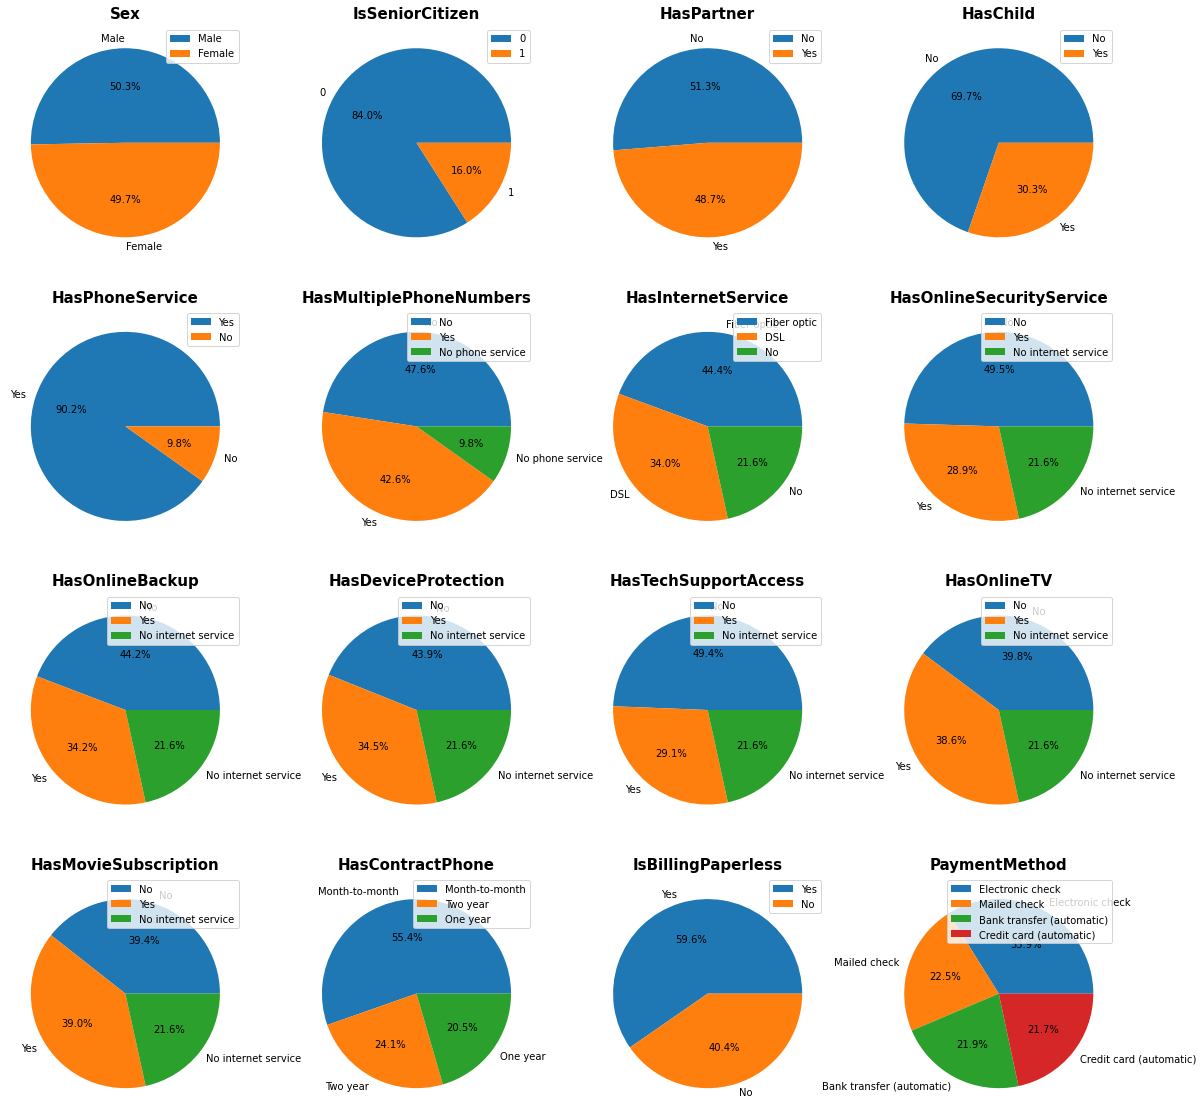

In [10]:
fig, axes = plt.subplots(4, 4, figsize=(20,20))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    d = data[cat_cols[i]].value_counts()
    axes[i].pie(d, labels = d.index, autopct='%1.1f%%')
    axes[i].set_title(col, size=15).set_weight('bold')
    axes[i].legend()

plt.show()

* Распределение целевой переменной

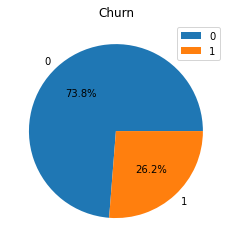

In [11]:
d = data[target_col].value_counts()
plt.pie(d, labels=d.index, autopct='%1.1f%%')
plt.title('Churn')
plt.legend()

plt.show()

Распределение целевой переменной не является равномерным, следовательно, использовать метрику `accuracy` в данной задаче не получится

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [13]:
dummies = pd.get_dummies(data[cat_cols])
X = pd.concat([data[num_cols], dummies], axis=1)
y = data[target_col]

X.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2207,10,40.70,449.3,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2468,13,70.15,886.7,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
864,13,95.05,1290.0,1,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
1270,14,19.50,272.0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
697,21,35.10,770.4,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1


In [14]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
param_grid = {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logisticregression__solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
    }

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    refit=True)

grid_search.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001],
                         'logisticregression__solver': ['lbfgs', 'newton-cg',
                                                        'liblinear', 'sag',
                                                        'saga']},
             scoring='roc_auc')

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [15]:
grid_search.best_score_, grid_search.best_params_

(0.8448208947144515,
 {'logisticregression__C': 100, 'logisticregression__solver': 'saga'})

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [16]:
from catboost import CatBoostClassifier

Разделять данные из train датасета с помощью `train_test_split` не обязательно. Внутри `CatBoostClassifier.grid_search` используется Cross-validation. Оценить качество полученной после обучения в `grid_search` модели можно по score в таблице соревнования. В противном случае 20% данных train датасета (при `test_size=0.8`) не будут участвовать в обучении модели и могут быть использованы только для оценки качества после обучения

In [17]:
cat_indicies = [data.columns.get_loc(key) for key in cat_cols]

X = data.drop([target_col], axis=1).values
y = data[target_col].values

In [18]:
boosting_model = CatBoostClassifier(cat_features=cat_indicies,
                                    task_type='CPU',
                                    eval_metric='AUC:hints=skip_train~false',
                                    metric_period=500,
                                    logging_level='Silent')

param_grid = {
    'iterations':[100, 300, 500],
    'learning_rate': [0.03, 0.01],
    'depth': [4, 6, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

grid_search_result = boosting_model.grid_search(
    param_grid=param_grid,
    X=X,
    y=y,
    cv=5,
    refit=True)

0:	loss: 0.8644264	best: 0.8644264 (0)	total: 595ms	remaining: 53s
1:	loss: 0.8544413	best: 0.8644264 (0)	total: 1.1s	remaining: 48.5s
2:	loss: 0.8639791	best: 0.8644264 (0)	total: 1.69s	remaining: 49.1s
3:	loss: 0.8586290	best: 0.8644264 (0)	total: 2.38s	remaining: 51.2s
4:	loss: 0.8647385	best: 0.8647385 (4)	total: 2.87s	remaining: 48.8s
5:	loss: 0.8572183	best: 0.8647385 (4)	total: 3.36s	remaining: 47s
6:	loss: 0.8643453	best: 0.8647385 (4)	total: 3.84s	remaining: 45.5s
7:	loss: 0.8584668	best: 0.8647385 (4)	total: 4.33s	remaining: 44.4s
8:	loss: 0.8655568	best: 0.8655568 (8)	total: 4.8s	remaining: 43.2s
9:	loss: 0.8544904	best: 0.8655568 (8)	total: 5.28s	remaining: 42.2s
10:	loss: 0.8648417	best: 0.8655568 (8)	total: 7.43s	remaining: 53.4s
11:	loss: 0.8637137	best: 0.8655568 (8)	total: 9.52s	remaining: 1m 1s
12:	loss: 0.8641044	best: 0.8655568 (8)	total: 11.7s	remaining: 1m 9s
13:	loss: 0.8641020	best: 0.8655568 (8)	total: 13.9s	remaining: 1m 15s
14:	loss: 0.8652840	best: 0.8655568

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [19]:
grid_search_result['params']

{'depth': 6, 'l2_leaf_reg': 5, 'iterations': 100, 'learning_rate': 0.03}

# Предсказания

In [20]:
best_model = boosting_model

In [21]:
X_test = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/test.csv')
submission = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.